# Scraping non-tabular content with ```BeautifulSoup```
### We'll learn to some basic scraping techniques using this mock site <a href="https://sandeepmj.github.io/scrape-example-page/demo-text.html">demo page</a>.


### All web scraping requires a little sleuthing:

* Where and how is the content held on the page?
* How can we access it?
* Is there a pattern?
* Is there anything that breaks the pattern?

In [1]:
## import library
import pandas as pd
import requests # es lo que trae todo el html del servidor
from bs4 import BeautifulSoup

In [2]:
## Requesting web content
url = "https://sandeepmj.github.io/scrape-example-page/demo-text.html"
##scrape url website
response = requests.get(url)

In [3]:
## did it work?
response.status_code

200

In [4]:
## what type of object did we capture?
type(response)

requests.models.Response

## Pull out what we want using

- ```response.text``` for string content like HTML, XML etc.
- ```response.content``` for binary content like PDFs, images, etc.

In [5]:
## what object does response.text return?
type(response.text)

str

In [6]:
## see reponse.text object
response.text

'<!doctype html>\n<html lang="en">\n<head>\n\t<title>title tag</title>\n\t<style>\nbody {padding: 20px; max-width: 700px; margin: 0 auto;}\n</style>\n</head>\n\n<body>\n\t<h1 class="title"><b>The title headline is Demo for BeautifulSoup</b></p></h1>\n\t<p>Learning to scrape using BeautifulSoup.</p>\n\t<div class="content article">\n\t\t<section>\n\t\t<p>Here\'s some pretty useless info:</p>\n\t</section>\n\t\t<section class="main" id="all_plants">\n\t\t\t<h2 class="subhead" id="vegitation">Plants</h2>\n\t\t\t<p class="article">Three plants that thrive in deep shade:</p>\n\t\t\t<ol>\n\t\t\t\t<li><a href="http://example.com/plant1" class="plants life" id="plant1">Plant 1</a>: <span class="cost">$10</span></li>\n\t\t\t\t<li><a href="http://example.com/plant2" class="plants life" id="plant2">Plant 2</a>: <span class="cost">$20</span></li>\n\t\t\t\t<li><a href="http://example.com/plant3" class="plants life" id="plant3">Plant 3</a> <span class="cost">$30</span></li>\n\t\t\t</ol>\n\t\t</secti

In [7]:
## what object does response.content return?
type(response.content)

bytes

In [8]:
## see reponse.text object
response.content

b'<!doctype html>\n<html lang="en">\n<head>\n\t<title>title tag</title>\n\t<style>\nbody {padding: 20px; max-width: 700px; margin: 0 auto;}\n</style>\n</head>\n\n<body>\n\t<h1 class="title"><b>The title headline is Demo for BeautifulSoup</b></p></h1>\n\t<p>Learning to scrape using BeautifulSoup.</p>\n\t<div class="content article">\n\t\t<section>\n\t\t<p>Here\'s some pretty useless info:</p>\n\t</section>\n\t\t<section class="main" id="all_plants">\n\t\t\t<h2 class="subhead" id="vegitation">Plants</h2>\n\t\t\t<p class="article">Three plants that thrive in deep shade:</p>\n\t\t\t<ol>\n\t\t\t\t<li><a href="http://example.com/plant1" class="plants life" id="plant1">Plant 1</a>: <span class="cost">$10</span></li>\n\t\t\t\t<li><a href="http://example.com/plant2" class="plants life" id="plant2">Plant 2</a>: <span class="cost">$20</span></li>\n\t\t\t\t<li><a href="http://example.com/plant3" class="plants life" id="plant3">Plant 3</a> <span class="cost">$30</span></li>\n\t\t\t</ol>\n\t\t</sect

### Something here about what beautifulsoup does:

- The structure and organization of HTML & CSS no longer work as they on web page.
- The ```response.text``` object is a string - literally. That's would be like our ```Python``` code losing its inherent functionality in Microsoft Word!
- ```BeautifulSoup``` turns that string back into an object that can tap the hierarchical structure of   ```HTML``` and ```CSS``` .

## Create a BeautifulSoup object
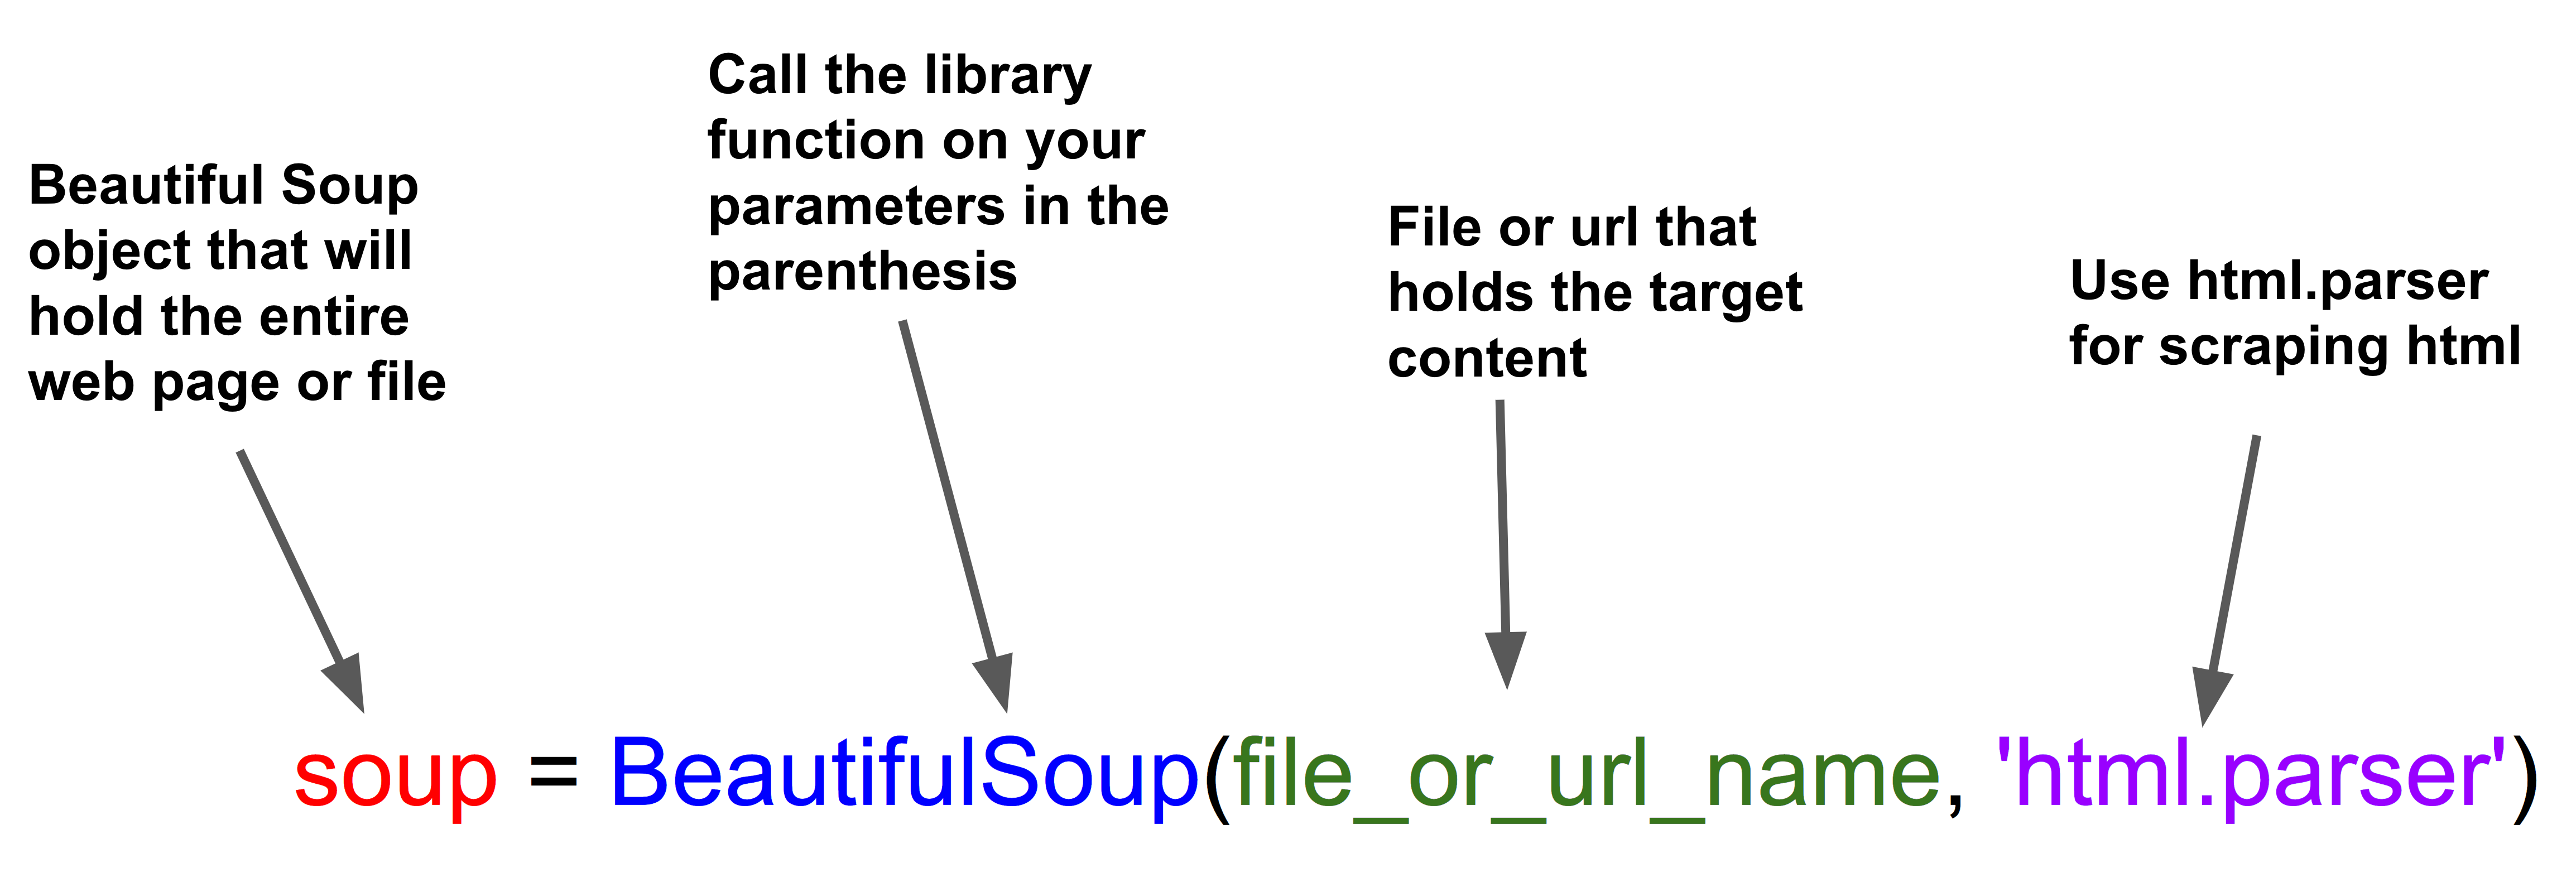

In [9]:
## we add name of our file
soup = BeautifulSoup(response.text, 'html.parser') #Esto vuelver a convertir el texto en un formato html, para scrapear
soup

<!DOCTYPE html>

<html lang="en">
<head>
<title>title tag</title>
<style>
body {padding: 20px; max-width: 700px; margin: 0 auto;}
</style>
</head>
<body>
<h1 class="title"><b>The title headline is Demo for BeautifulSoup</b></h1>
<p>Learning to scrape using BeautifulSoup.</p>
<div class="content article">
<section>
<p>Here's some pretty useless info:</p>
</section>
<section class="main" id="all_plants">
<h2 class="subhead" id="vegitation">Plants</h2>
<p class="article">Three plants that thrive in deep shade:</p>
<ol>
<li><a class="plants life" href="http://example.com/plant1" id="plant1">Plant 1</a>: <span class="cost">$10</span></li>
<li><a class="plants life" href="http://example.com/plant2" id="plant2">Plant 2</a>: <span class="cost">$20</span></li>
<li><a class="plants life" href="http://example.com/plant3" id="plant3">Plant 3</a> <span class="cost">$30</span></li>
</ol>
</section>
<section class="main" id="all_animals">
<h2 class="subhead" id="creatures">Animals</h2>
<p class="arti

In [10]:
## prettify our printout
print(soup.prettify())

<!DOCTYPE html>
<html lang="en">
 <head>
  <title>
   title tag
  </title>
  <style>
   body {padding: 20px; max-width: 700px; margin: 0 auto;}
  </style>
 </head>
 <body>
  <h1 class="title">
   <b>
    The title headline is Demo for BeautifulSoup
   </b>
  </h1>
  <p>
   Learning to scrape using BeautifulSoup.
  </p>
  <div class="content article">
   <section>
    <p>
     Here's some pretty useless info:
    </p>
   </section>
   <section class="main" id="all_plants">
    <h2 class="subhead" id="vegitation">
     Plants
    </h2>
    <p class="article">
     Three plants that thrive in deep shade:
    </p>
    <ol>
     <li>
      <a class="plants life" href="http://example.com/plant1" id="plant1">
       Plant 1
      </a>
      :
      <span class="cost">
       $10
      </span>
     </li>
     <li>
      <a class="plants life" href="http://example.com/plant2" id="plant2">
       Plant 2
      </a>
      :
      <span class="cost">
       $20
      </span>
     </li>
     <li>
 

In [11]:
## What type of file is it?
type(soup)

bs4.BeautifulSoup

# Targeting content



### ```HTML tags```

In [12]:
## get title of page
soup.title

<title>title tag</title>

In [13]:
## What about the h1 tag with the class of title?
## How can we have two titles?
soup.h1


<h1 class="title"><b>The title headline is Demo for BeautifulSoup</b></h1>

## Searching for IDs

```soup(id="ID_name")```

In [14]:
## SEARCH BY ID for "animal1"
soup (id = "animal1")

[<a class="animals life" href="http://example.com/animal1" id="animal1">Animal 1</a>]

In [16]:
## SEARCH BY ID for "plant1"
soup (id = "plant1")

[<a class="plants life" href="http://example.com/plant1" id="plant1">Plant 1</a>]

## Finding ```class```

Let's say we want to find the first ```p tag``` content for the ```article class```

```find()``` returns the first occurence of any item you are searching for.

There are three ways to target our content but only Method 3 is the most precise way.




In [17]:
## a wide net is not best
soup.p

<p>Learning to scrape using BeautifulSoup.</p>

### Method 1. Target the tag only.

```soup.find("tag_name")```


In [18]:
## simple but without precision
## still too wide a net
soup.find (class_ = "article") #No usas class porque es una palabra reservada. Poner un _ para evitarlo.

<div class="content article">
<section>
<p>Here's some pretty useless info:</p>
</section>
<section class="main" id="all_plants">
<h2 class="subhead" id="vegitation">Plants</h2>
<p class="article">Three plants that thrive in deep shade:</p>
<ol>
<li><a class="plants life" href="http://example.com/plant1" id="plant1">Plant 1</a>: <span class="cost">$10</span></li>
<li><a class="plants life" href="http://example.com/plant2" id="plant2">Plant 2</a>: <span class="cost">$20</span></li>
<li><a class="plants life" href="http://example.com/plant3" id="plant3">Plant 3</a> <span class="cost">$30</span></li>
</ol>
</section>
<section class="main" id="all_animals">
<h2 class="subhead" id="creatures">Animals</h2>
<p class="article"> Three animals in the barn:</p>
<ol>
<li><a class="animals life" href="http://example.com/animal1" id="animal1">Animal 1</a>: <span class="cost">$500</span></li>
<li><a class="animals life" href="http://example.com/animal2" id="animal2">Animal 2</a>: <span class="cost">$

### Method 2. Target the class only




- Use ```soup.find(class_="class_name"``` to be clear what class we are looking for.
- ```class_``` is not Python or BeautifulSoup. It is simply there to tell us we are looking for a ```class```. Because ```class``` (a type of data) is a Python reserved word, we add the ```_``` to tell us we are referring to an ```HTML class```.


In [19]:
# find the first p tag with the class "article"
## this is still too wide
soup.find("p", class_="article")

<p class="article">Three plants that thrive in deep shade:</p>

### Method 3. Precision, clarity and simplicity

In the previous example, we could have run into trouble in case the ```class = "article"``` applied to multiple tags.

- Use the ```tag``` and the ```class``` to add precision, clarity and simplicity.

```soup.find("tag_name", class_="class_name")```

In [20]:
# find the first p tag with the class "article"
soup.find("p", class_="article")

<p class="article">Three plants that thrive in deep shade:</p>

## ```find_all``` tags, classes

- ```find_all``` is **the most widely** used BeautifulSoup command.
- Unlike ```find``` it returns **ALL** occurences of a class or tag.
- Remember ```find``` returns just the first occurence.
- ```soup.find_all("tag_name", class_="class_name")```
- It returns all occurences in a **```beautifulSoup object```** that is similiar to a **```list```**.

In [21]:
## Return all p tag content with the class "article"
my_articles = soup.find_all("p", class_ = "article") # tag name : p

In [22]:
## what type of object is returned
type(my_articles)

bs4.element.ResultSet

In [23]:
## slice first item from this resultSet object
my_articles[0] # find_all siempre devuelve una lista. Hay cosas que no podemos hacer, hay que hacerlo por cada elemento (con loops)

<p class="article">Three plants that thrive in deep shade:</p>

In [24]:
## what type of object is this first resultSet object?
type(my_articles[0])

bs4.element.Tag

### Find all life forms on the page

In [25]:
## code it here and store in lifeforms
lifeforms = soup.find_all("a", class_="life") # en class, cada palabra cuenta como una clase por separado
lifeforms

[<a class="plants life" href="http://example.com/plant1" id="plant1">Plant 1</a>,
 <a class="plants life" href="http://example.com/plant2" id="plant2">Plant 2</a>,
 <a class="plants life" href="http://example.com/plant3" id="plant3">Plant 3</a>,
 <a class="animals life" href="http://example.com/animal1" id="animal1">Animal 1</a>,
 <a class="animals life" href="http://example.com/animal2" id="animal2">Animal 2</a>,
 <a class="animals life" href="http://example.com/animal3" id="animal3">Animal 3</a>]

## Text only!

We don't need the ```HTML``` or ```CSS``` for our analysis.

In [26]:
## return just a string of the tag:
soup.title.string # lamentablemente no es una buena forma porque funciona sólo en algunos casos

'title tag'

### string v. get_text()

In most cases, our final step in a scrape is to convert everything to a string. We don't want all the ```html```.

We can use ```.string``` or ```get_text().```

- ```get_text()``` is far more powerful because you can add parameters to strip, specify separators, etc.

I **only** use ```get_text()```.


In [27]:
## get only title text and not html
soup.title.get_text()

'title tag'

In [28]:
## use string on soup (returns nothing)
soup.string

In [29]:
## get text from soup
soup.get_text()

"\n\n\ntitle tag\n\n\n\nThe title headline is Demo for BeautifulSoup\nLearning to scrape using BeautifulSoup.\n\n\nHere's some pretty useless info:\n\n\nPlants\nThree plants that thrive in deep shade:\n\nPlant 1: $10\nPlant 2: $20\nPlant 3 $30\n\n\n\nAnimals\n Three animals in the barn:\n\nAnimal 1: $500\nAnimal 2: $600 \nAnimal 3: $700\n\n\n\nObjects\n Three shiny rocks:\n\nRock 1\nRock 2\nRock 3\n\n\n\nThe seven classifications of animals\n\nKingdom\nPhylum\nClass\nOrder\nFamily\nGenus\nSpecies\n\n\n\n\n\n"

In [30]:
## get rid of weird characters
soup.get_text(strip = "True")

"title tagThe title headline is Demo for BeautifulSoupLearning to scrape using BeautifulSoup.Here's some pretty useless info:PlantsThree plants that thrive in deep shade:Plant 1:$10Plant 2:$20Plant 3$30AnimalsThree animals in the barn:Animal 1:$500Animal 2:$600Animal 3:$700ObjectsThree shiny rocks:Rock 1Rock 2Rock 3The seven classifications of animalsKingdomPhylumClassOrderFamilyGenusSpecies"

In [31]:
## get p tag text
soup.p.get_text()

'Learning to scrape using BeautifulSoup.'

### Getting only text from a ```ResultSet``` object

In [32]:
## recall our lifeforms object
lifeforms

[<a class="plants life" href="http://example.com/plant1" id="plant1">Plant 1</a>,
 <a class="plants life" href="http://example.com/plant2" id="plant2">Plant 2</a>,
 <a class="plants life" href="http://example.com/plant3" id="plant3">Plant 3</a>,
 <a class="animals life" href="http://example.com/animal1" id="animal1">Animal 1</a>,
 <a class="animals life" href="http://example.com/animal2" id="animal2">Animal 2</a>,
 <a class="animals life" href="http://example.com/animal3" id="animal3">Animal 3</a>]

In [33]:
## get just the text from lifeforms
## this breaks
lifeform_t = []
for life in lifeforms:
    lifeform_t.append(life.get_text())
lifeform_t

['Plant 1', 'Plant 2', 'Plant 3', 'Animal 1', 'Animal 2', 'Animal 3']

### You can't just get the text for the lifeforms.
### Why? You can't call ```.get_text()``` on a ```<class 'bs4.element.ResultSet'>``` object.


## Instead, iterate through and work on each item in the list (same as a ```ResultSet```) which in this case is a ```<class 'bs4.element.Tag'>```

In [34]:
## for for all lifeforms
lifeform_fl = []
for life in lifeforms:
    lifeform_fl.append(life.get_text())
lifeform_fl

['Plant 1', 'Plant 2', 'Plant 3', 'Animal 1', 'Animal 2', 'Animal 3']

## Storing values

We haven't been saving in values in memory.


In [35]:
## store text only into a list called lifeforms_fl
lifeform_fl = []
for life in lifeforms:
    lifeform_fl.append(life.get_text())
lifeform_fl

['Plant 1', 'Plant 2', 'Plant 3', 'Animal 1', 'Animal 2', 'Animal 3']

In [36]:
## just the text, no html
## Using for list comprehension
## store in a list called lifeforms_lc
lifeform_lc = [life.get_text() for life in lifeforms]
lifeform_lc

['Plant 1', 'Plant 2', 'Plant 3', 'Animal 1', 'Animal 2', 'Animal 3']

In [37]:
## what type of objects are lifeform_fl and lifeform_lc
type(lifeform_fl)

list

In [38]:
type(lifeform_lc)

list

## Capturing URLs
```.get('href')```



In [39]:
## recall lifeforms
lifeforms

[<a class="plants life" href="http://example.com/plant1" id="plant1">Plant 1</a>,
 <a class="plants life" href="http://example.com/plant2" id="plant2">Plant 2</a>,
 <a class="plants life" href="http://example.com/plant3" id="plant3">Plant 3</a>,
 <a class="animals life" href="http://example.com/animal1" id="animal1">Animal 1</a>,
 <a class="animals life" href="http://example.com/animal2" id="animal2">Animal 2</a>,
 <a class="animals life" href="http://example.com/animal3" id="animal3">Animal 3</a>]

Recall that ```lifeforms``` is a ```ResultSet``` object. We have to iterate through to capture the urls using ```.get('href')```.

In [40]:
## use for loop and save into links_fl
links_fl = []
for link in lifeforms:
    links_fl.append(link.get("href"))
links_fl

['http://example.com/plant1',
 'http://example.com/plant2',
 'http://example.com/plant3',
 'http://example.com/animal1',
 'http://example.com/animal2',
 'http://example.com/animal3']

In [41]:
# using list comprehension to save into links_lc
links_lc = [link.get("href") for link in lifeforms]
links_lc

['http://example.com/plant1',
 'http://example.com/plant2',
 'http://example.com/plant3',
 'http://example.com/animal1',
 'http://example.com/animal2',
 'http://example.com/animal3']

## Cost

Let's grab the cost

How do we target the cost?

In [42]:
## A wide target:
costs = soup.find_all("span", class_ = "cost")

In [43]:
## using for loop
costs_fl = []
for cost in costs:
    costs_fl.append(cost.get_text())
costs_fl

['$10', '$20', '$30', '$500', '$600', '$700']

In [44]:
## using list comprehension
costs_lc = [cost.get_text() for cost in costs]
costs_lc

['$10', '$20', '$30', '$500', '$600', '$700']

## Prepare to Export

You now have one list that holds the name of the lifeform and another that holds the related URL.

Let's create a dict call ```life_dict```.

Keys are name and url...values are the related values


In [45]:
## create a list that zips all items together. Combina en el orden de cada lista: hacer un spot check!
life_list = []
for item in zip (lifeform_lc, costs_lc, links_lc):
    life_list.append(item)
life_list

[('Plant 1', '$10', 'http://example.com/plant1'),
 ('Plant 2', '$20', 'http://example.com/plant2'),
 ('Plant 3', '$30', 'http://example.com/plant3'),
 ('Animal 1', '$500', 'http://example.com/animal1'),
 ('Animal 2', '$600', 'http://example.com/animal2'),
 ('Animal 3', '$700', 'http://example.com/animal3')]

## Export as CSV

We'll use Pandas to export our data to an external file.

We'll cover this in more detail soon, but for now here it is:

In [46]:
df = pd.DataFrame(life_list)
df.columns = ["Product", "Cost", "More Info"]
df

Product  Cost                   More Info
0   Plant 1   $10   http://example.com/plant1
1   Plant 2   $20   http://example.com/plant2
2   Plant 3   $30   http://example.com/plant3
3  Animal 1  $500  http://example.com/animal1
4  Animal 2  $600  http://example.com/animal2
5  Animal 3  $700  http://example.com/animal3

In [47]:
## use pandas to write to csv file
df.to_csv("life_list.csv", index = False, encoding = "UTF-8")

# BeautifulSoup

We covered some basic BeautifulSoup functionality:

- Remember ```soup``` is just a term we use to store an entire webpage or file. We could call it anything we want.
- Searching by ```tags``` like ```title```, ```h1```, ```span``` etc.
- Searching by ```class``` or ```id```
- Finding all occurences of an item using ```find_all()```
- Finding the first occurence of an item using ```find()```
- Removing the html and returning just the string by using ```.string``` or ```get_text()```
- Grabbing just the URL(s) using ```get("href")```

These are the most frequently used BeautifulSoup functions. You can [find many more](https://www.crummy.com/software/BeautifulSoup/bs4/doc/#) in the documentation.
